## Load needed packages

In [1]:
from datasets import list_datasets, load_dataset
from pprint import pprint
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
tqdm.pandas()
from collections import Counter

## Finding the actual labels

In [2]:
# daily_dialogue_dataset = load_dataset('daily_dialog')  

In [3]:
# train_df = daily_dialogue_dataset["train"].to_pandas()
# val_df = daily_dialogue_dataset["validation"].to_pandas()
# test_df = daily_dialogue_dataset["test"].to_pandas()
# all_df = pd.concat([train_df, val_df, test_df])

In [4]:
# emotions_list = all_df["emotion"].to_list()
# emotions_list = [l.tolist() for l in emotions_list]
# emotions_list = [item for sublist in emotions_list for item in sublist]
# Counter(emotions_list)

According to the original paper, the emotion label distribution is the following:

Anger 1022,
Disgust 353, 
Fear 74, 
Happiness 12885, 
Sadness 1150,
Surpise 1823, 
Other 85572

Therefore, the emotion categories of Daily Dialogue are in the following order: 

In [5]:
dd_emotion_categories = ["Other", "Anger", "Disgust", "Fear", "Happiness", "Sadness", "Surprise"]

## Load dataframes from pickle files 

In [6]:
loaded_electra_emotion_chain_df = pd.read_pickle("electra_emotion_chain_df")
loaded_emotion_chain_df = pd.read_pickle("emotion_chain_df")
loaded_all_df = pd.read_pickle("all_df")

## Visualizing results

### Using DailyDialog native emotion labels

<AxesSubplot:xlabel='emotions_following_6', ylabel='Count'>

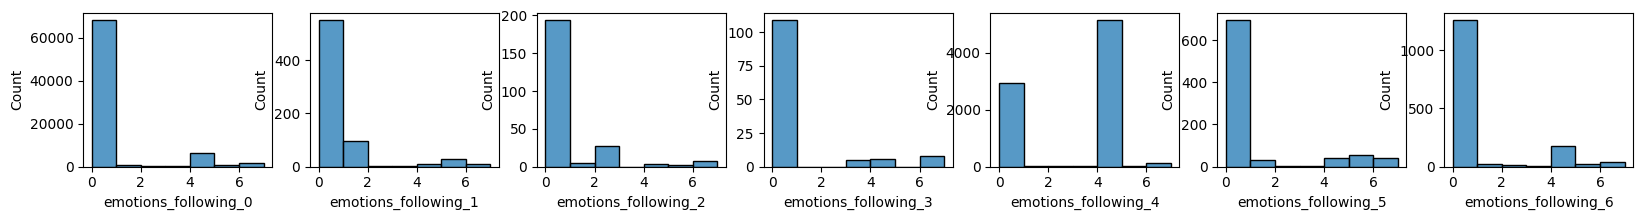

In [7]:
fig, ax = plt.subplots(1, 7, figsize=(20, 2))
xlabels = [0, 1, 2, 3, 4, 5, 6, 7]
dd_emotion_categories = ["Other", "Anger", "Disgust", "Fear", "Happiness", "Sadness", "Surprise"]

sns.histplot(loaded_emotion_chain_df['emotions_following_0'], bins=xlabels, ax=ax[0])
sns.histplot(loaded_emotion_chain_df['emotions_following_1'], bins=xlabels, ax=ax[1])
sns.histplot(loaded_emotion_chain_df['emotions_following_2'], bins=xlabels, ax=ax[2])
sns.histplot(loaded_emotion_chain_df['emotions_following_3'], bins=xlabels, ax=ax[3])
sns.histplot(loaded_emotion_chain_df['emotions_following_4'], bins=xlabels, ax=ax[4])
sns.histplot(loaded_emotion_chain_df['emotions_following_5'], bins=xlabels, ax=ax[5])
sns.histplot(loaded_emotion_chain_df['emotions_following_6'], bins=xlabels, ax=ax[6])

Looks like the emotion "0" (Other) is dominant. Let's remove it from the histogram to observe other actual emotions.ù

In [8]:
dd_emotion_categories

['Other', 'Anger', 'Disgust', 'Fear', 'Happiness', 'Sadness', 'Surprise']

Text(0.5, 0, 'Emotions following Surprise')

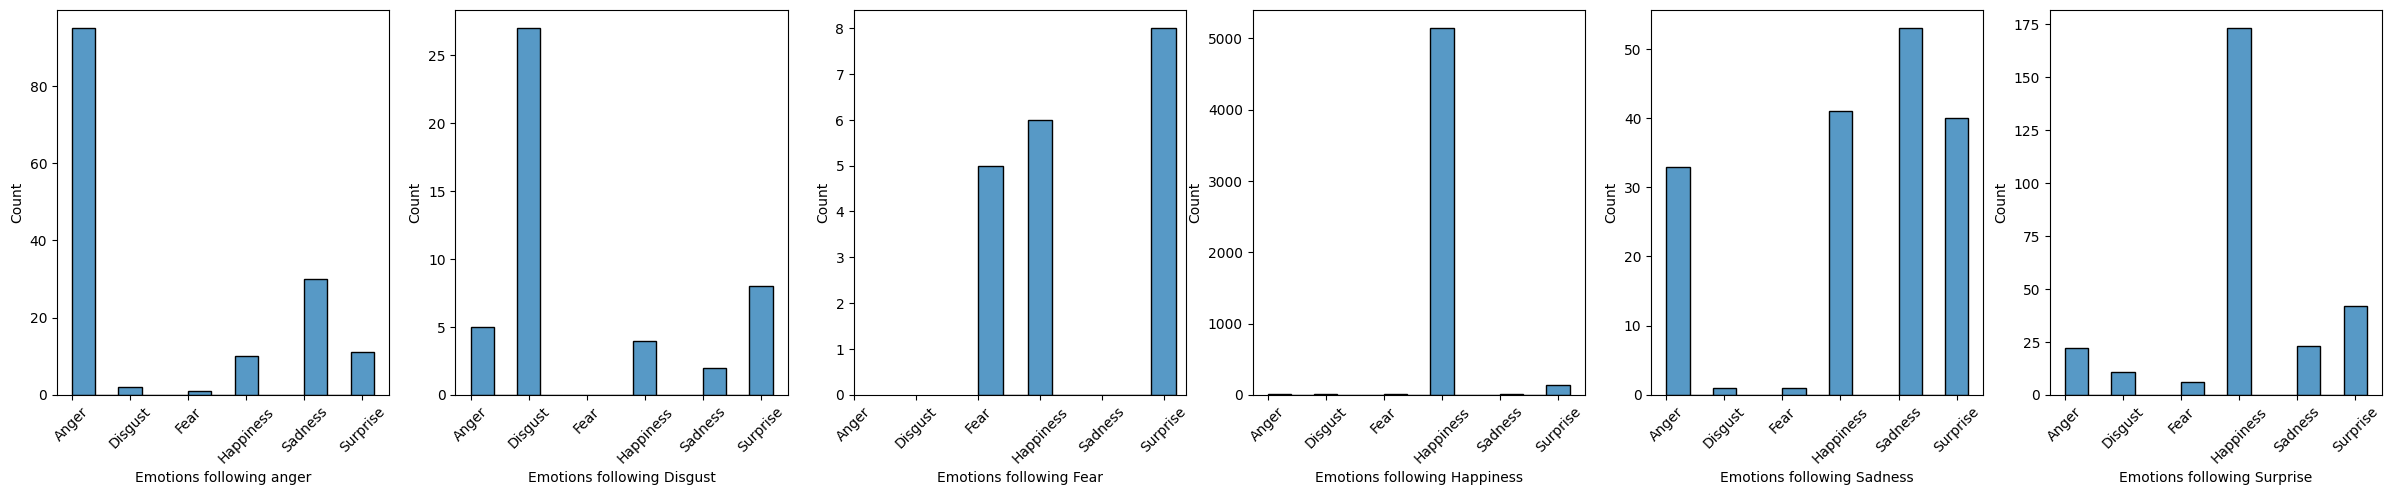

In [9]:
fig, ax = plt.subplots(1, 6, figsize=(30, 5))
xlabels = [1, 2, 3, 4, 5, 6]

sns.histplot(loaded_emotion_chain_df['emotions_following_1'][loaded_emotion_chain_df['emotions_following_1']>0], bins=xlabels, ax=ax[0], binwidth=0.4)
ax[0].xaxis.set_ticks([1, 2, 3, 4, 5, 6])
ax[0].set_xticklabels(dd_emotion_categories[1:], rotation = 45)
ax[0].set_xlabel("Emotions following anger")

sns.histplot(loaded_emotion_chain_df['emotions_following_2'][loaded_emotion_chain_df['emotions_following_2']>0], bins=xlabels, ax=ax[1], binwidth=0.4)
ax[1].xaxis.set_ticks([1, 2, 3, 4, 5, 6])
ax[1].set_xticklabels(dd_emotion_categories[1:], rotation = 45)
ax[1].set_xlabel("Emotions following Disgust")

sns.histplot(loaded_emotion_chain_df['emotions_following_3'][loaded_emotion_chain_df['emotions_following_3']>0], bins=xlabels, ax=ax[2], binwidth=0.4)
ax[2].xaxis.set_ticks([1, 2, 3, 4, 5, 6])
ax[2].set_xticklabels(dd_emotion_categories[1:], rotation = 45)
ax[2].set_xlabel("Emotions following Fear")

sns.histplot(loaded_emotion_chain_df['emotions_following_4'][loaded_emotion_chain_df['emotions_following_4']>0], bins=xlabels, ax=ax[3], binwidth=0.4)
ax[3].xaxis.set_ticks([1, 2, 3, 4, 5, 6])
ax[3].set_xticklabels(dd_emotion_categories[1:], rotation = 45)
ax[3].set_xlabel("Emotions following Happiness")

sns.histplot(loaded_emotion_chain_df['emotions_following_5'][loaded_emotion_chain_df['emotions_following_5']>0], bins=xlabels, ax=ax[4], binwidth=0.4)
ax[4].xaxis.set_ticks([1, 2, 3, 4, 5, 6])
ax[4].set_xticklabels(dd_emotion_categories[1:], rotation = 45)
ax[4].set_xlabel("Emotions following Sadness")

sns.histplot(loaded_emotion_chain_df['emotions_following_6'][loaded_emotion_chain_df['emotions_following_6']>0], bins=xlabels, ax=ax[5], binwidth=0.4)
ax[5].xaxis.set_ticks([1, 2, 3, 4, 5, 6])
ax[5].set_xticklabels(dd_emotion_categories[1:], rotation = 45)
ax[5].set_xlabel("Emotions following Surprise")

### Using Electra emotion classifier

  0%|          | 0/28 [00:00<?, ?it/s]

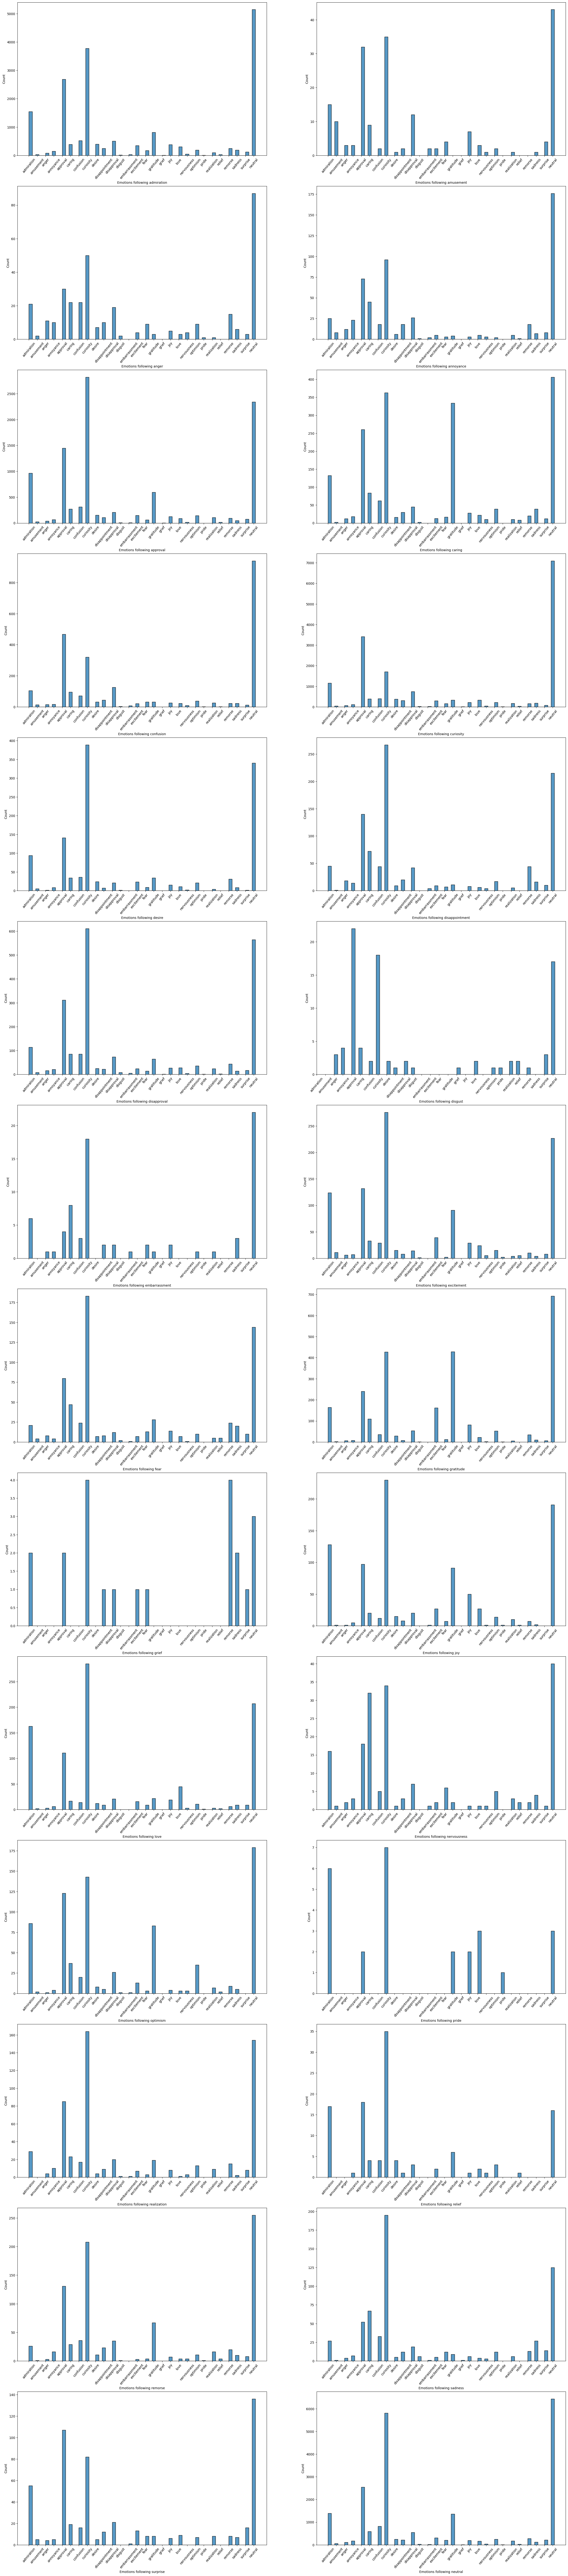

In [10]:
emotion_categories = ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
       'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
       'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
       'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
       'relief', 'remorse', 'sadness', 'surprise', 'neutral']
Tot = 28
Cols = 2
Rows = Tot // Cols 
if Tot % Cols != 0:
    Rows += 1
Position = range(1,Tot + 1)

xticks = []
xticks.extend(range(len(emotion_categories)))

fig = plt.figure(figsize=(30, 140))
for k in tqdm(range(Tot)):
    ax = fig.add_subplot(Rows,Cols,Position[k])
    sns.histplot(loaded_electra_emotion_chain_df['emotions_following_'+str(k)], bins=xticks, ax=ax, binwidth=0.4)
    ax.xaxis.set_ticks(xticks)
    ax.set_xticklabels(emotion_categories, rotation = 50)
    ax.set_xlabel("Emotions following " + emotion_categories[k])

plt.show()

## Verifying results

There is a contradiction between the two classifications: anger follows anger according to DailyDialogue labels. However, I find that using Electra labels, anger usually doesn't follow anger. Let's dive deeper: 

In [11]:
daily_dialogue_dataset = load_dataset('daily_dialog')  

Found cached dataset daily_dialog (/home/ahmed_b/.cache/huggingface/datasets/daily_dialog/default/1.0.0/1d0a58c7f2a4dab5ed9d01dbde8e55e0058e589ab81fce5c2df929ea810eabcd)


  0%|          | 0/3 [00:00<?, ?it/s]

In [12]:
train_df = daily_dialogue_dataset["train"].to_pandas()
val_df = daily_dialogue_dataset["validation"].to_pandas()
test_df = daily_dialogue_dataset["test"].to_pandas()
all_df = pd.concat([train_df, val_df, test_df])
sample_df = all_df.iloc[:100]

In [61]:
df = all_df

In [62]:
df.head()

,dialog,act,emotion
0,"[Say , Jim , how about going for a few beers a...","[3, 4, 2, 2, 2, 3, 4, 1, 3, 4]","[0, 0, 0, 0, 0, 0, 4, 4, 4, 4]"
1,"[Can you do push-ups ? , Of course I can . It...","[2, 1, 2, 2, 1, 1]","[0, 0, 6, 0, 0, 0]"
2,"[Can you study with the radio on ? , No , I l...","[2, 1, 2, 1, 1]","[0, 0, 0, 0, 0]"
3,"[Are you all right ? , I will be all right so...","[2, 1, 1, 1]","[0, 0, 0, 0]"
4,"[Hey John , nice skates . Are they new ? , Ye...","[2, 1, 2, 1, 1, 2, 1, 3, 4]","[0, 0, 0, 0, 0, 6, 0, 6, 0]"


In [77]:
# define the sequence of integers to find
sequence = [1, 1]

# use apply with a lambda function to check if the sequence is present in each row
result = df[df['emotion'].apply(lambda x: any(x[i:i+len(sequence)].tolist() == sequence for i in range(len(x)-len(sequence)+1)))]

print(f"there are {len(result)} elements with anger following anger")

there are 49 elements with anger following anger


In [84]:
# define the sequence of integers to find
sequence = [1, 1]

# use apply with a lambda function to check if the sequence is present in each row
result = df[df['emotion'].apply(lambda x: any(x[i:i+len(sequence)].tolist() == sequence for i in range(len(x)-len(sequence)+1)))]

print(f"there are {len(result)} elements with anger following anger")

there are 49 elements with anger following anger


It looks like the DD labels do not reflect the emotions accurately. In fact, in DD labels, the utterance "It smells like an ashtray in here !" is labeled with the emotion "anger", wheras with our electra emotion classifier, it is labeled with the "disgust" emotion, which is more accurate. 

Another example labeled with "anger" emotion is the utterance "Oh , my God ! I've been cheated !" wheras with our own classifier, we have the "disappointment" label. 

We can conclude that our Electra classifier is more accurate when it comes to emotion labellling and thus we're going to use our own labels instead of DD's labels. 

# Choosing the appropriate emotion following a given emotion

In [85]:
def show_the_most_following_emotion(data_chain):
    most_common_following_emotions = []
    for idx, emotion in enumerate(emotion_categories):
        most_common_following_emotion_idx = data_chain["emotions_following_"+str(idx)].value_counts().idxmax()
        most_common_following_emotion = emotion_categories[int(most_common_following_emotion_idx)]
        most_common_following_emotions.append(most_common_following_emotion)
    most_common_df = pd.DataFrame(list(zip(emotion_categories, most_common_following_emotions)),
                                  columns =['Initial emotion', 'Mostly followed by'])
    return most_common_df  

def show_the_most_following_emotion_without_neutral(data_chain):
    most_common_following_emotions = []
    for idx, emotion in enumerate(emotion_categories):
        if data_chain["emotions_following_"+str(idx)].value_counts().idxmax() != 27:
            most_common_following_emotion_idx = data_chain["emotions_following_"+str(idx)].value_counts().idxmax()
        else:
            most_common_following_emotion_idx = data_chain["emotions_following_"+str(idx)].value_counts().index[1]
        most_common_following_emotion = emotion_categories[int(most_common_following_emotion_idx)]
        most_common_following_emotions.append(most_common_following_emotion)
    most_common_df = pd.DataFrame(list(zip(emotion_categories, most_common_following_emotions)),
                                  columns =['Initial emotion', 'Mostly followed by'])
    return most_common_df   

In [87]:
loaded_electra_emotion_chain_df = pd.read_pickle("electra_emotion_chain_df")

In [95]:
dd_emotion_choice_df = show_the_most_following_emotion(loaded_electra_emotion_chain_df)
dd_emotion_choice_df

,Initial emotion,Mostly followed by
0,admiration,neutral
1,amusement,neutral
2,anger,neutral
3,annoyance,neutral
4,approval,curiosity
5,caring,neutral
6,confusion,neutral
7,curiosity,neutral
8,desire,curiosity
9,disappointment,curiosity


In [96]:
dd_emotion_choice_no_neutral_df = show_the_most_following_emotion_without_neutral(loaded_electra_emotion_chain_df)
dd_emotion_choice_no_neutral_df

,Initial emotion,Mostly followed by
0,admiration,curiosity
1,amusement,curiosity
2,anger,curiosity
3,annoyance,curiosity
4,approval,curiosity
5,caring,curiosity
6,confusion,approval
7,curiosity,approval
8,desire,curiosity
9,disappointment,curiosity


In [98]:
dd_emotion_choice_df.to_pickle("dd_emotion_choice_df")
dd_emotion_choice_no_neutral_df.to_pickle("dd_emotion_choice_no_neutral_df")